# Assignment # 5 : Bootstrap Resampling.
## Data Science 350
In this assignment I am applying boot strap resampling method on auto part data to calculate **MEAN** on different groups and in this process comparing the mean price across them.  I then also go on to compare the **MEAN** obtained through this method with **MEAN** obtained through **ttest, AVONA and plain arithmetic methods**.
* Following libraries have been added for this assignment.
    - simpleboot
    - dplyr
    - repr
* I am loading a cleansed automobile price data file provided in the assignment.
* As part of assignment exercise, I am calcualting the logarithm of price data.
* I am then normalizing the price and log(price) data using z-score algorithm and in the process calculating its **MEAN** through the regular R function for future comparison with mean derived from **BOOTSTRAP** method.
* I am then using dplyr package to add log price and normalised log price to the auto.price data frame.
* While stratifying the data, I am not using the sample function as the dataset is too small and taking a sample is leading to inconsistent results on multiple runs.
    - Data is stratified based on Fuel Type (Diesel & Gas), Aspiration(Standard & Turbo) and Body Style(Five different kinds).
* Calculating standard mean across Fuel Type, Aspsiration and Body style for future comparision.
* Welch t-test is being used to calculate the mean price grouped by fuel type and aspiration. 
  - I am now retrieving the mean of **GAS and DIESEL** automobiles for future comparsion with mean derived from **BOOTSTRAP** method
  - I am now retrieving the mean of **STANDARD and TURBO** automobiles for future comparsion with mean derived from **BOOTSTRAP** method.
* Calculate **ONE BOOTSTRAP** resampled mean of Diesel,Gas, Standard & Turbo automobiles and compare the **MEAN** price to the respective standard and t-test mean.
    - Numerically we can see a difference of **0** between **<span style="color:red">Standard and ONE BOOTSTRAP</span>** mean of Diesel,Gas,Standard & Turbo cars.
    - Numerically there is a difference of **0** between mean calcualted by **<span style="color:red">t-test and ONE BOOTSTRAP</span>** method.
* This result has also been plotted to **visually validate the 95% confidence interval**.
    - Control interval of Turbo cars does not overlap zero and its MEAN is on the right hand side of zero hence it can be safely concluded that Turbo mean is above the average mean of automobiles.
    - Control interval of standard cars overlaps zero and its mean is on the left hand side of zero hence it can be safely concluded that Standard mean is below the average mean of the auto price and this would be true for more than 95 % . 
    - Control interval of Diesel very slightly overlaps zero and its MEAN is on the right hand side of zero hence it can be safely concluded that DIESEL mean is above the average mean of almost 95 % automobiles.
    - Control interval of Gas overlaps zero and its mean less than the average mean of more than 95 %.
* **TWO BOOTSTRAP** resampled mean has been calculated between **<span style="color:red">10 body style combinations**<span style="color:red">.  
    - Numerically compare the mean price difference between 10 body styles obtained through ONE BOOT & TWO BOOT.
    - These numbers are then further compared with ANOVA anaylsis from Assignment#4.

## Function Description
In this function I am loading and cleansing "Automobile price data _Raw_.csv" provided to us as part of this assignment. Herein I am coercing some character columns to numeric so they can computed with ease using R functions. I then use the "complete.cases" function to remove any non numeric data. 

In [83]:
rm(list=ls())
# Clear Console:
cat("\014")
library(simpleboot)
library(dplyr)
library(repr)
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, 
                         stringsAsFactors = FALSE)
  
  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)
  
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}

## Call the function and normalize the price data.
Here i am calling the function **read.auto()** to load the cleansed data.
In this process I have removed 10 records from this file. I now have a total of 195 observations in auto.price dataframe. 
- Retrieve price data and calculate it logarithm.
- Normalize the price and log(price) data using z-score algorithm.

In [84]:
# Load and cleanse the csv file.
auto.price = read.auto()
# Get price data in a vector
price <- auto.price$price
#Log of price data
logprice <- log(price)

#z-Score Normalization of price data
mean_price <- mean(price)
sd_price <- sd(price)
normalized_price <- (price - mean_price) / sd_price
mean_normalized_price <- mean(normalized_price)

#z-Score Normalization of log price data
mean_logprice <- mean(logprice)
sd_logprice <- sd(logprice)
normalized_logprice <- (logprice - mean_logprice) / sd_logprice
mean_normalized_logprice <- mean(normalized_logprice)


Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"

## Add log price and normalized log price to the data frame.
I am now using dplyr package to add two new columns in the loaded data frame (auto.price) so I can use this data for sampling.

In [85]:
#Add log price and normalized log price to the data frame.
require(dplyr)
auto.price = mutate(auto.price, logprice = logprice, normalized_price = normalized_price, normalized_logprice = normalized_logprice)

## Group automobile price data as per fuel type, aspiration and body style.
- I am now using the stratifying technique to group the data as per fuel type and aspiration.    

In [86]:
#Stratifying the data.
#Stratify By Fuel Type
logpricegroupedbyfueltypegas = auto.price %>% filter(fuel.type == 'gas')
logpricegroupedbyfueltypediesel = auto.price %>% filter(fuel.type == 'diesel')
#Stratify by Aspiration
logpricegroupedbyaspirationstd = auto.price %>% filter(aspiration == 'std')
logpricegroupedbyaspirationsturbo = auto.price %>% filter(aspiration == 'turbo')
#Stratify data as per body style.
stratified_pricebody_con = auto.price %>% filter(body.style == 'convertible')
stratified_pricebody_hat = auto.price %>% filter(body.style == 'hatchback')
stratified_pricebody_sed = auto.price %>% filter(body.style == 'sedan')
stratified_pricebody_wag = auto.price %>% filter(body.style == 'wagon')
stratified_pricebody_har = auto.price %>% filter(body.style == 'hardtop')

## Calculate standard mean
- Calculate standard mean across fuel type, aspiration and body style

In [87]:
#Standard mean.
stdmeanftgas <- mean(logpricegroupedbyfueltypegas$normalized_logprice)
stdmeanftdiesel <- mean(logpricegroupedbyfueltypediesel$normalized_logprice)
stdmeanaspstd <- mean(logpricegroupedbyaspirationstd$normalized_logprice)
stdmeanasptur <- mean(logpricegroupedbyaspirationsturbo$normalized_logprice)
stdmeanbsconv <- mean(stratified_pricebody_con$normalized_logprice)
stdmeanbshar <- mean(stratified_pricebody_har$normalized_logprice)
stdmeanbshat <- mean(stratified_pricebody_hat$normalized_logprice)
stdmeanbssed <- mean(stratified_pricebody_sed$normalized_logprice)
stdmeanbswag <- mean(stratified_pricebody_wag$normalized_logprice)

## Calculate mean using Welch t-test.
- I am now using Welch t-test to get the mean of auto price grouped by Fuel Type (Gas & Diesel) and Aspiration (Turbo & Standard), this would be used to compare with mean calculated through BOOTSTRAP.

In [88]:
## Student T-Test to calculate the mean based on Fuel Type
ttestftgas <- t.test(logpricegroupedbyfueltypegas$normalized_logprice, auto.price$normalized_logprice, alternative = "two.sided")
ttestftgasestimate <- ttestftgas$estimate
ttestftgasmean <- ttestftgasestimate[1]
ttestftdiesel <- t.test(logpricegroupedbyfueltypediesel$normalized_logprice, auto.price$normalized_logprice, alternative = "two.sided")
ttestftdieselestimate <- ttestftdiesel$estimate
ttestftdieselmean <- ttestftdieselestimate[1]

## Student T-Test to calculate the mean based on Aspiration.
ttestaspstd<- t.test(logpricegroupedbyaspirationstd$normalized_logprice, auto.price$normalized_logprice, alternative = "two.sided")
ttestaspstdestimate <- ttestaspstd$estimate
ttestaspstdmean <- ttestaspstdestimate[1]
ttestaspturbo <- t.test(logpricegroupedbyaspirationsturbo$normalized_logprice, auto.price$normalized_logprice, alternative = "two.sided")
ttestaspturboestimate <- ttestaspturbo$estimate
ttestaspturbomean <- ttestaspturboestimate[1]

## Calculate Bootstrap resampled mean.
- I am now using one boot method to calculate the means grouped by Fuel Type and Aspiration.    

In [89]:
## Bootstrap the mean of the auto price grouped by aspiration
mean.boot.aspstd = one.boot(logpricegroupedbyaspirationstd$normalized_logprice, mean, R = 100000)
mean.boot.aspturb = one.boot(logpricegroupedbyaspirationsturbo$normalized_logprice, mean, R = 100000)
# Retrieve mean for numerical comparision between the means using ONE BOOT method.
NumericBoostrapMeanAspStd <- mean.boot.aspstd$t0
NumericBoostrapMeanAspTur <- mean.boot.aspturb$t0

## Bootstrap the mean of the auto price grouped by fuel type
mean.boot.ftgas = one.boot(logpricegroupedbyfueltypegas$normalized_logprice, mean, R = 100000)
mean.boot.ftdiesel = one.boot(logpricegroupedbyfueltypediesel$normalized_logprice, mean, R = 100000)
# Retrieve mean for numerical comparision between the means using ONE BOOT method.
NumericBoostrapMeanftgas <- mean.boot.ftgas$t0
NumericBoostrapMeanftdiesel <- mean.boot.ftdiesel$t0

## Numerically compare price means.
- Numerically we can see a difference of **0** between **<span style="color:red">ONE BOOTSTRAP and Standard </span>** mean of Diesel,Gas,Standard & Turbo cars.
- Numerically there is a difference of **0** between mean calcualted by **<span style="color:red">t-test and ONE BOOTSTRAP</span>** method.

In [90]:
cat("Difference between ONE bootstrap resampled mean and standard mean of Turbo cars" , "is:",NumericBoostrapMeanAspTur - stdmeanasptur,"\n")
cat("Difference between ONE bootstrap resampled mean and standard mean of Standard cars" , "is:",NumericBoostrapMeanAspStd - stdmeanaspstd,"\n")
cat("Difference between ONE bootstrap resampled mean of turbo and t-test mean of turbo cars" , "is:",NumericBoostrapMeanAspTur - ttestaspturbomean,"\n")
cat("Difference between ONE bootstrap resampled mean of standard and t-test mean of standard cars" , "is:",NumericBoostrapMeanAspStd - ttestaspstdmean,"\n")

cat("Difference between ONE bootstrap resampled mean and standard mean of Diesel cars" , "is:",NumericBoostrapMeanftdiesel - stdmeanftdiesel,"\n")
cat("Difference between ONE bootstrap resampled mean and standard mean of Gas cars" , "is:",NumericBoostrapMeanftgas - stdmeanftgas,"\n")
cat("Difference between ONE bootstrap resampled mean of Diesel and t-test mean of Diesel cars" , "is:",NumericBoostrapMeanftdiesel - ttestftdieselmean,"\n")
cat("Difference between ONE bootstrap resampled mean of Gas and t-test mean of gas cars" , "is:",NumericBoostrapMeanftgas - ttestftgasmean,"\n")


Difference between ONE bootstrap resampled mean and standard mean of Turbo cars is: 0 
Difference between ONE bootstrap resampled mean and standard mean of Standard cars is: 0 
Difference between ONE bootstrap resampled mean of turbo and t-test mean of turbo cars is: 0 
Difference between ONE bootstrap resampled mean of standard and t-test mean of standard cars is: 0 
Difference between ONE bootstrap resampled mean and standard mean of Diesel cars is: 0 
Difference between ONE bootstrap resampled mean and standard mean of Gas cars is: 0 
Difference between ONE bootstrap resampled mean of Diesel and t-test mean of Diesel cars is: 0 
Difference between ONE bootstrap resampled mean of Gas and t-test mean of gas cars is: 0 


## Visually validate the 95% confidence interval
- Control interval of Turbo does not overlap zero and its MEAN is on the right hand side of zero hence it can be safely concluded that Turbo mean is above the average mean of automobiles.
- Control interval of standard overlaps zero and its mean is on the left hand side of zero hence it can be safely concluded that Standard mean is below the average mean of the auto price and this would be true for more than 95 % . 
- Control interval of Diesel very slightly overlaps zero and its MEAN is on the right hand side of zero hence it can be safely concluded that DIESEL mean is above the average mean of almost 95 % automobiles.
- Control interval of Gas overlaps zero and its mean less than the average mean of more than 95 %.

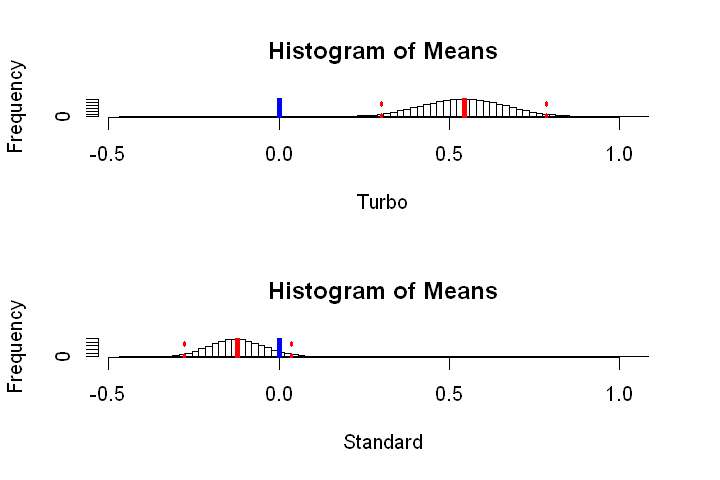

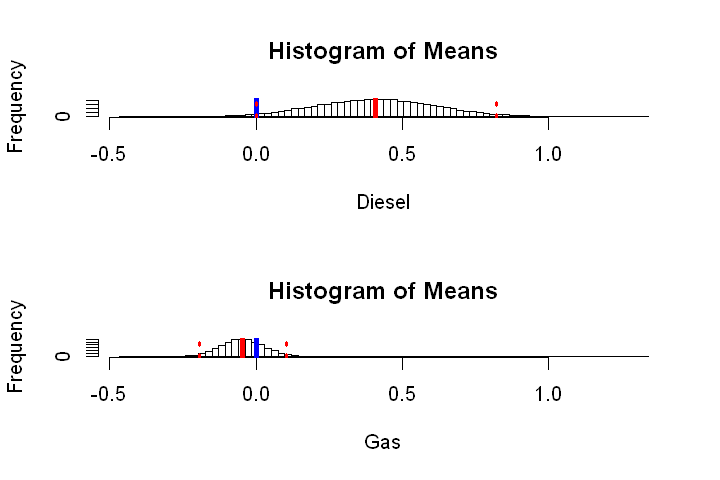

In [91]:
#Plot Mean
plot.hist <- function(a, maxs,mins, cols = c('pop_A', 'pop_B'), nbins = 80, p = 0.05){
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  hist(a, breaks = breaks, main = paste('Histogram of Means'), xlab = cols[1])
  abline(v = mean(a), lwd = 4, col = 'red')
  abline(v = 0, lwd = 4, col = 'blue')
  abline(v = quantile(a, probs = p/2), lty = 3, col = 'red', lwd = 3)  
  abline(v = quantile(a, probs = (1 - p/2)), lty = 3, col = 'red', lwd = 3)
}

plot.t <- function(a, b, cols = c('pop_A', 'pop_B'), nbins = 80, p = 0.05){
  maxs = max(c(max(a), max(b)))
  mins = min(c(min(a), min(b)))
  par(mfrow = c(2, 1))
  plot.hist(a, maxs, mins, cols = cols[1])
  plot.hist(b, maxs, mins, cols = cols[2])
  par(mfrow = c(1, 1))
}
#Visually see the difference in between ONE bootstrap resampled Std and Turbo means.
plot.t(mean.boot.aspturb$t,mean.boot.aspstd$t, cols = c('Turbo', 'Standard'),nbins = 80)

#Visually see the difference in between ONE bootstrap resampled Std and Turbo means.
plot.t(mean.boot.ftdiesel$t, mean.boot.ftgas$t, cols = c('Diesel', 'Gas'),nbins = 80)

## TWO BOOT resampled mean across the body style.
- There are 5 body styles in the supplied data frame, this would translate into 10 combinations (5cR).
- Calculate mean using ONE BOOT of five different body styles, which I am going to use for numerical analysis
- Calculate "Mean Difference" using TWO BOOT across 10 different combinations.
- Confirm that difference calculated using ONE BOOT is **equal** to "Mean Difference" of TWO BOOT.

In [92]:
## One Bootstrap the mean of the auto price grouped by body style
mean.boot.bsconv = one.boot(stratified_pricebody_con$normalized_logprice, mean, R = 100000)
mean.boot.bshar = one.boot(stratified_pricebody_har$normalized_logprice, mean, R = 100000)
mean.boot.bshat = one.boot(stratified_pricebody_hat$normalized_logprice, mean, R = 100000)
mean.boot.bssed = one.boot(stratified_pricebody_sed$normalized_logprice, mean, R = 100000)
mean.boot.bswag = one.boot(stratified_pricebody_wag$normalized_logprice, mean, R = 100000)

# Two BootStrap mean of the auto price based on body style
## Two Bootstrap : Difference in means of Hardtop & Convertible
two.boot.mean.bsharconv = two.boot(stratified_pricebody_har$normalized_logprice,stratified_pricebody_con$normalized_logprice,mean, R = 100000)
## Two Bootstrap : Difference in means of Hatchback & Convertible
two.boot.mean.bshatconv = two.boot(stratified_pricebody_hat$normalized_logprice,stratified_pricebody_con$normalized_logprice,mean, R = 100000)
## Two Bootstrap : Difference in means of Sedan & Convertible
two.boot.mean.bssedconv = two.boot(stratified_pricebody_sed$normalized_logprice,stratified_pricebody_con$normalized_logprice,mean, R = 100000)
## Two Bootstrap : Difference in means of Wagon & Convertible
two.boot.mean.bswagconv = two.boot(stratified_pricebody_wag$normalized_logprice,stratified_pricebody_con$normalized_logprice,mean, R = 100000)
## Two Bootstrap : Difference in means of Hatchback & Hardtop
two.boot.mean.bshathar = two.boot(stratified_pricebody_hat$normalized_logprice,stratified_pricebody_har$normalized_logprice,mean, R = 100000)
## Two Bootstrap : Difference in means of Sedan & Hardtop
two.boot.mean.bssedhar = two.boot(stratified_pricebody_sed$normalized_logprice,stratified_pricebody_har$normalized_logprice,mean, R = 100000)
## Two Bootstrap : Difference in means of Wagon & Hardtop
two.boot.mean.bswaghar = two.boot(stratified_pricebody_wag$normalized_logprice,stratified_pricebody_har$normalized_logprice,mean, R = 100000)
## Two Bootstrap : Difference in means of Sedan & Hatchback
two.boot.mean.bssedhat = two.boot(stratified_pricebody_sed$normalized_logprice,stratified_pricebody_hat$normalized_logprice,mean, R = 100000)
## Two Bootstrap : Difference in means of Wagon & Hatchback
two.boot.mean.bswaghat = two.boot(stratified_pricebody_wag$normalized_logprice,stratified_pricebody_hat$normalized_logprice,mean, R = 100000)
## Two Bootstrap : Difference in means of Wagon & Sedan
two.boot.mean.bswagsed = two.boot(stratified_pricebody_wag$normalized_logprice,stratified_pricebody_sed$normalized_logprice,mean, R = 100000)

# Retrieve mean for numerical comparision between the means using ONE BOOT method.
NumericBoostrapMeanbsconv <- mean.boot.bsconv$t0
NumericBoostrapMeanbshar <- mean.boot.bshar$t0
NumericBoostrapMeanbshat <- mean.boot.bshat$t0
NumericBoostrapMeanbssed <- mean.boot.bssed$t0
NumericBoostrapMeanbswag <- mean.boot.bswag$t0

#Numerical difference.
cat("Difference between ONE bootstrap resampled mean of Hardtop and covertible cars" , "is:",NumericBoostrapMeanbshar - NumericBoostrapMeanbsconv,"\n")
cat("Difference between TWO bootstrap resampled mean of Hardtop and covertible cars" , "is:",two.boot.mean.bsharconv$t0,"\n")
cat("Difference between ONE bootstrap resampled mean of Hatchback and covertible cars" , "is:",NumericBoostrapMeanbshat - NumericBoostrapMeanbsconv,"\n")
cat("Difference between TWO bootstrap resampled mean of Hatchback and covertible cars" , "is:",two.boot.mean.bshatconv$t0,"\n")
cat("Difference between ONE bootstrap resampled mean of Sedan and covertible cars" , "is:",NumericBoostrapMeanbssed - NumericBoostrapMeanbsconv,"\n")
cat("Difference between TWO bootstrap resampled mean of Sedan and covertible cars" , "is:",two.boot.mean.bssedconv$t0,"\n")
cat("Difference between ONE bootstrap resampled mean of Wagon and covertible cars" , "is:",NumericBoostrapMeanbswag - NumericBoostrapMeanbsconv,"\n")
cat("Difference between TWO bootstrap resampled mean of Wagon and covertible cars" , "is:",two.boot.mean.bswagconv$t0,"\n")
cat("Difference between ONE bootstrap resampled mean of Hatchback and hardtop cars" , "is:",NumericBoostrapMeanbshat - NumericBoostrapMeanbshar,"\n")
cat("Difference between TWO bootstrap resampled mean of Hatchback and hardtop cars" , "is:",two.boot.mean.bshathar$t0,"\n")
cat("Difference between ONE bootstrap resampled mean of Sedan and hardtop cars" , "is:",NumericBoostrapMeanbssed - NumericBoostrapMeanbshar,"\n")
cat("Difference between TWO bootstrap resampled mean of Sedan and hardtop cars" , "is:",two.boot.mean.bssedhar$t0,"\n")
cat("Difference between ONE bootstrap resampled mean of Wagon and hardtop cars" , "is:",NumericBoostrapMeanbswag - NumericBoostrapMeanbshar,"\n")
cat("Difference between TWO bootstrap resampled mean of Wagon and hardtop cars" , "is:",two.boot.mean.bswaghar$t0,"\n")
cat("Difference between ONE bootstrap resampled mean of Sedan and hatchback cars" , "is:",NumericBoostrapMeanbssed - NumericBoostrapMeanbshat,"\n")
cat("Difference between TWO bootstrap resampled mean of Sedan and hatchback cars" , "is:",two.boot.mean.bssedhat$t0,"\n")
cat("Difference between ONE bootstrap resampled mean of Wagon and hatchback cars" , "is:",NumericBoostrapMeanbswag - NumericBoostrapMeanbshat,"\n")
cat("Difference between TWO bootstrap resampled mean of Wagon and hatchback cars" , "is:",two.boot.mean.bswaghat$t0,"\n")
cat("Difference between ONE bootstrap resampled mean of Wagon and sedan cars" , "is:",NumericBoostrapMeanbswag - NumericBoostrapMeanbssed,"\n")
cat("Difference between TWO bootstrap resampled mean of Wagon and sedan cars" , "is:",two.boot.mean.bswagsed$t0,"\n")


Difference between ONE bootstrap resampled mean of Hardtop and covertible cars is: -0.1898926 
Difference between TWO bootstrap resampled mean of Hardtop and covertible cars is: -0.1898926 
Difference between ONE bootstrap resampled mean of Hatchback and covertible cars is: -1.543056 
Difference between TWO bootstrap resampled mean of Hatchback and covertible cars is: -1.543056 
Difference between ONE bootstrap resampled mean of Sedan and covertible cars is: -0.8879373 
Difference between TWO bootstrap resampled mean of Sedan and covertible cars is: -0.8879373 
Difference between ONE bootstrap resampled mean of Wagon and covertible cars is: -1.043319 
Difference between TWO bootstrap resampled mean of Wagon and covertible cars is: -1.043319 
Difference between ONE bootstrap resampled mean of Hatchback and hardtop cars is: -1.353163 
Difference between TWO bootstrap resampled mean of Hatchback and hardtop cars is: -1.353163 
Difference between ONE bootstrap resampled mean of Sedan and h

## Plot TWO BOOTSTRAP resampled mean across Body style.
- CI of mean difference of Hardtop & Convertible **<span style="color:red">is overlapping zero</span>**, hence we can safely deduce that more than 95 % of such cars are priced very closely to each other and it matches the high p-adj and low D value from Tukey analysis.
- CI of mean difference of Hatchback & Convertible **<span style="color:red">does not overlap zero</span>**, hence we can deduce that more than 95 % of such vehicles are priced differently from each other, it matches the low medium p-adj and high D value from Tukey analysis.
- CI of mean difference of Sedan & Convertible **<span style="color:red">does not overlap zero</span>**, hence we can deduce that more than 95 % of such vehicles are priced differently from each other, it matches the low p-adj and high D value from Tukey analysis.
- CI of mean difference of Wagon & Convertible **<span style="color:red">does not overlap zero</span>**, hence we can deduce that more than 95 % of such vehicles are priced differently from each other, it matches the low medium p-adj and high D value from Tukey analysis.
- CI of mean difference of Hatchback & Hardtop **<span style="color:red">does not overlap zero</span>**, hence we can deduce that more than 95 % of such vehicles are priced differently from each other, it matches the low medium p-adj and high D value from Tukey analysis.
- CI of mean difference of Sedan & Hardtop **<span style="color:red">is overlapping zero</span>**, hence we can safely deduce that more than 95 % of such cars are priced closely to each other.
- CI of mean difference of Wagon & Hardtop **<span style="color:red">is overlapping zero</span>**, hence we can safely deduce that more than 95 % of such cars are priced closely to each other.
- CI of mean difference of Sedan & Hatchback **<span style="color:red">does not overlap zero</span>**, hence we can safely deduce that more than 95 % of such cars are priced differently from each other.
- CI of mean difference of Wagon & Hatchback **<span style="color:red">does not overlap zero</span>**, hence we can safely deduce that more than 95 % of such cars are priced differently from each other.
- CI of mean difference of Wagon & Sedan **<span style="color:red">is overlapping zero</span>**, hence we can safely deduce that more than 95 % of such cars are priced closely to each other.

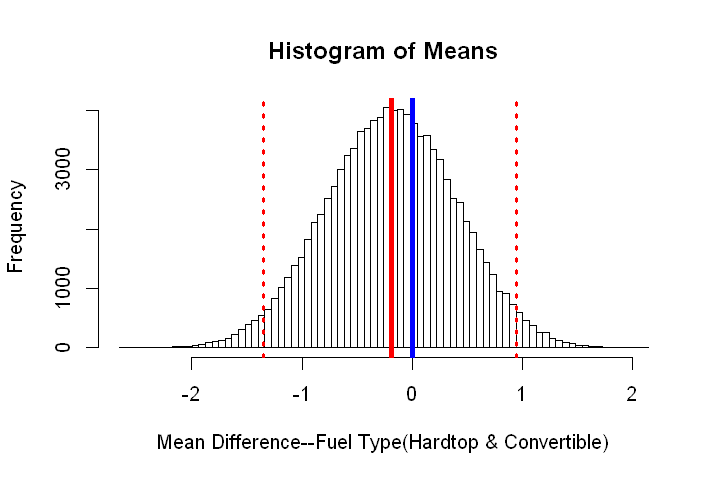

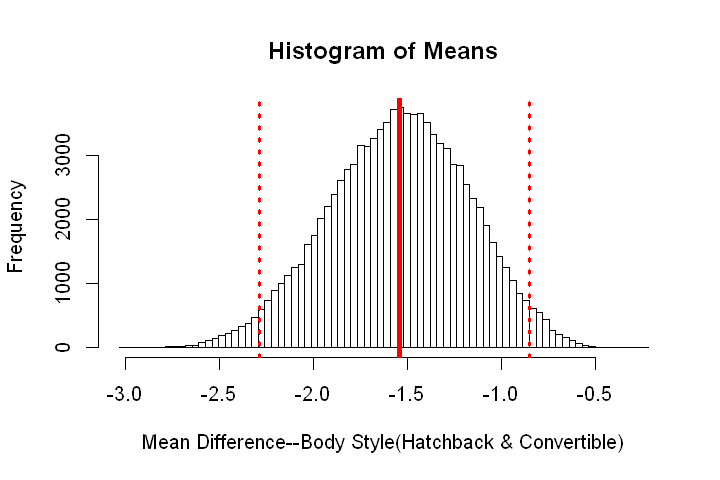

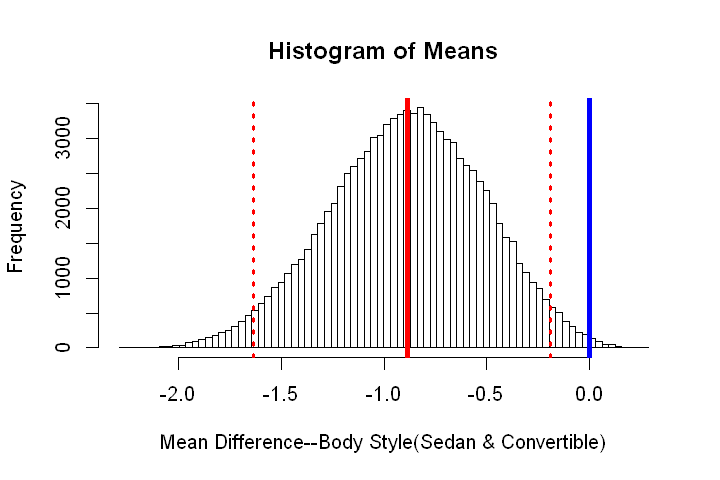

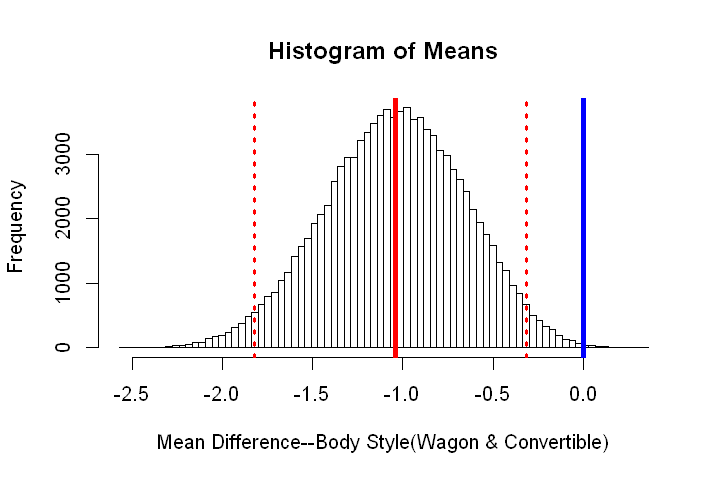

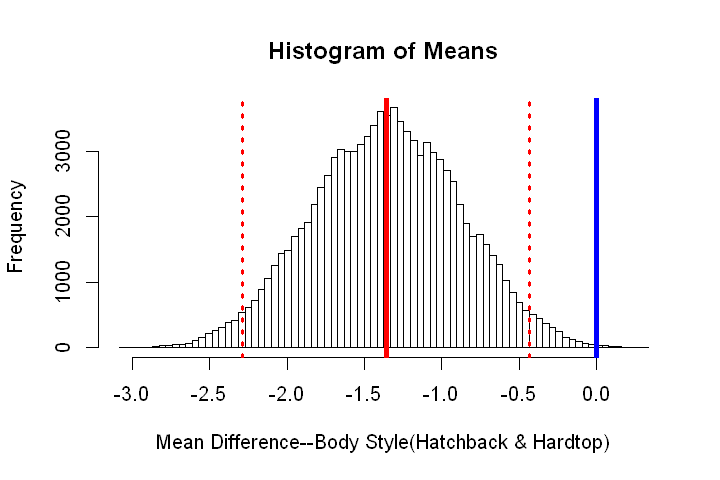

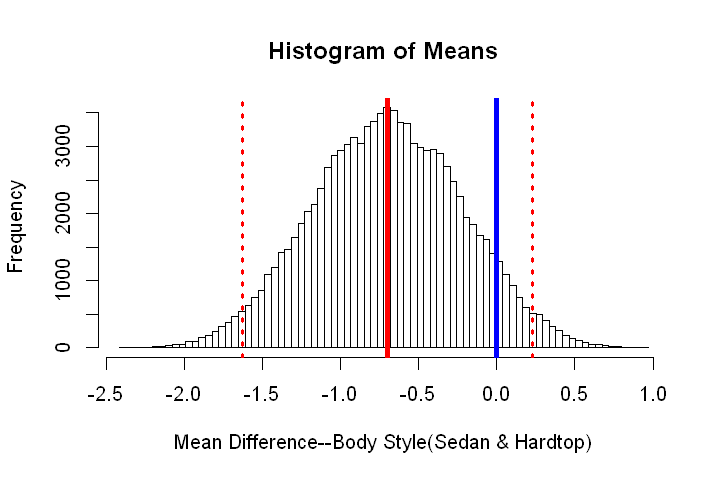

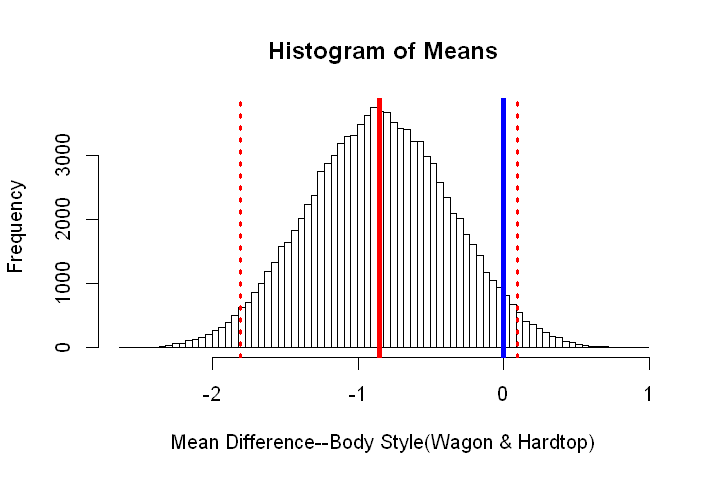

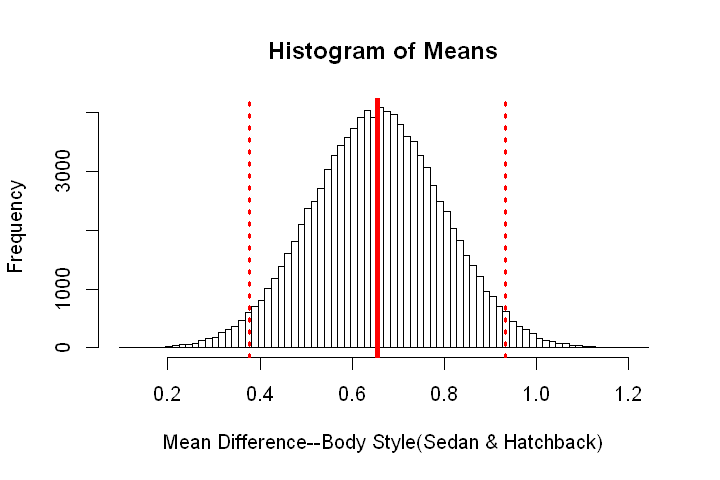

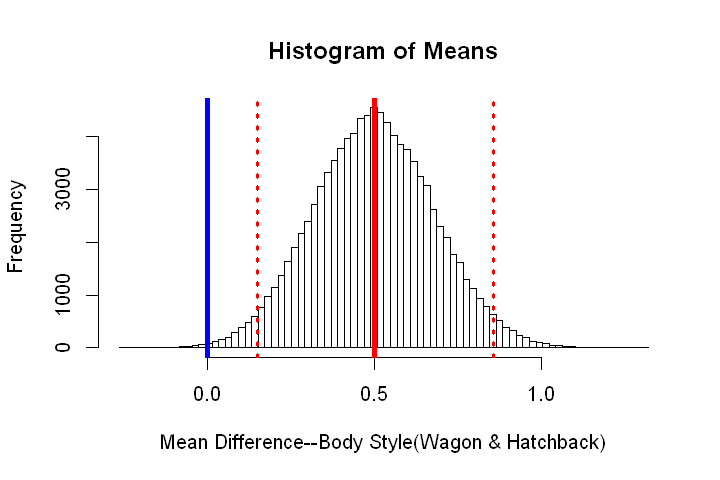

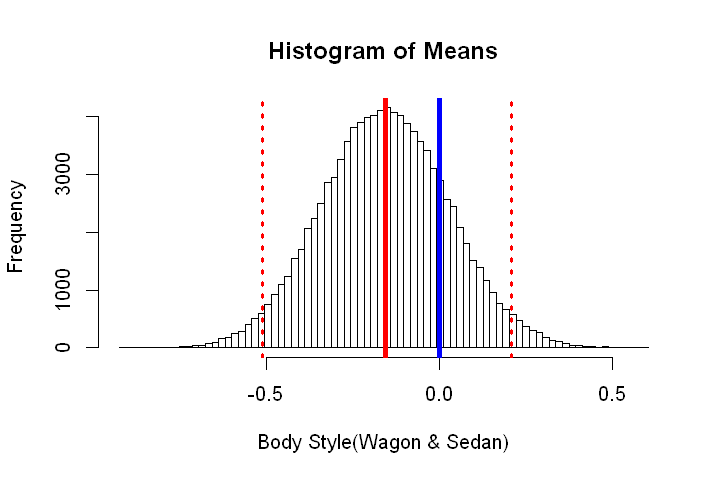

In [93]:
## Function to plot TWO BOOT.
plot.diff <- function(a, cols = c('pop_A'), nbins = 80, p = 0.05){
  maxs = max(a)
  mins = min(a)
  plot.hist(a, maxs, mins, cols = cols[1])
}
options(repr.plot.width=6, repr.plot.height=4)
# Plot TWO BOOTSTRAP resample mean grouped by Body style
plot.diff(two.boot.mean.bsharconv$t,cols = c('Mean Difference--Fuel Type(Hardtop & Convertible)'))
plot.diff(two.boot.mean.bshatconv$t,cols = c('Mean Difference--Body Style(Hatchback & Convertible)'))
plot.diff(two.boot.mean.bssedconv$t,cols = c('Mean Difference--Body Style(Sedan & Convertible)'))
plot.diff(two.boot.mean.bswagconv$t,cols = c('Mean Difference--Body Style(Wagon & Convertible)'))
plot.diff(two.boot.mean.bshathar$t,cols = c('Mean Difference--Body Style(Hatchback & Hardtop)'))
plot.diff(two.boot.mean.bssedhar$t,cols = c('Mean Difference--Body Style(Sedan & Hardtop)'))
plot.diff(two.boot.mean.bswaghar$t,cols = c('Mean Difference--Body Style(Wagon & Hardtop)'))
plot.diff(two.boot.mean.bssedhat$t,cols = c('Mean Difference--Body Style(Sedan & Hatchback)'))
plot.diff(two.boot.mean.bswaghat$t,cols = c('Mean Difference--Body Style(Wagon & Hatchback)'))
plot.diff(two.boot.mean.bswagsed$t,cols = c('Body Style(Wagon & Sedan)'))